In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

## Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
def check_file_exists(fn, url):
    """
    check if file exists in my local directory, if not, pull from web and
    return dataframe
    """
    if os.path.isfile(fn):
        print('csv file found and loaded')
        return pd.read_csv(fn, index_col=0)
    else: 
        print('creating df and saving as csv')
        df = pd.read_csv(url)
        df.to_csv(fn)
        return df 

In [3]:
df = check_file_exists('lemonade.csv',\
'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
df

csv file found and loaded


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [69]:
df['Date'] = df.Date.astype('datetime64')

In [70]:
df = df.set_index(df[['Date']])

TypeError: 'Series' object is not callable

## Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [58]:
def outliers(df, m=1.5):
    col_cat = [] #this is for my categorical variables 
    col_num = [] #this is for my numerical variables 
    for col in df.columns: 
        if col in df.select_dtypes(include=['int64', 'float64']): 
            col_num.append(col) 
        else: 
            col_cat.append(col) 

    for col in col_cat: 
        print(f"{col.capitalize().replace('_', ' ')} is a categorical column.") 
    print(f"--------------------------------------------")
    print(f'Outliers Calculated with IQR Ranges, multiplier {m}')

    for col in col_num:
        # calculate the quartiles
        q1 = df[col].quantile(.25) 
        q3 = df[col].quantile(.75) 
        
        # get the range
        iqr = q3 - q1 
        
        # create the upper and lower fences
        upper_bound = q3 + (m * iqr) 
        lower_bound = q1 - (m * iqr) 
        print(f"{col.capitalize().replace('_', ' ')} <= {upper_bound.round(2)} and > {lower_bound.round(2)}")
        
        print(f"Location of lower outliers")
        print(df[col] [(df[col] < lower_bound)])
        print(f"\n")

In [59]:
outliers(df)

Date is a categorical column.
Day is a categorical column.
--------------------------------------------
Outliers Calculated with IQR Ranges, multiplier 1.5
Temperature <= 104.7 and > 16.7
Location of lower outliers
364    15.1
Name: Temperature, dtype: float64


Rainfall <= 1.3 and > 0.26
Location of lower outliers
Series([], Name: Rainfall, dtype: float64)


Flyers <= 76.0 and > 4.0
Location of lower outliers
324   -38
Name: Flyers, dtype: int64


Price <= 0.5 and > 0.5
Location of lower outliers
Series([], Name: Price, dtype: float64)


Sales <= 45.0 and > 5.0
Location of lower outliers
Series([], Name: Sales, dtype: int64)




In [34]:
def hist(df):
    for col in df.columns:
        plt.hist(df[col])
        plt.title({col})
        plt.show()

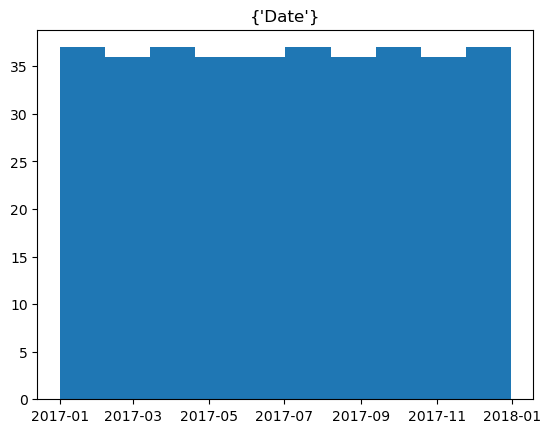

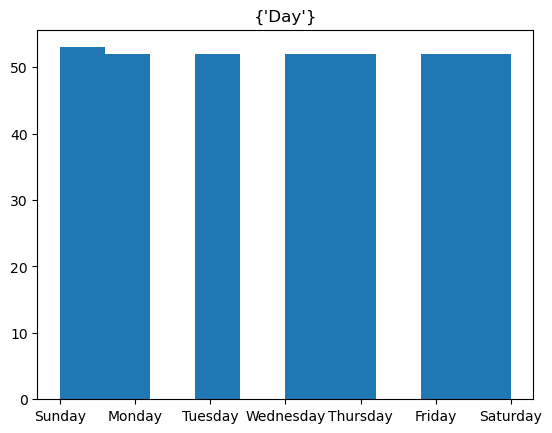

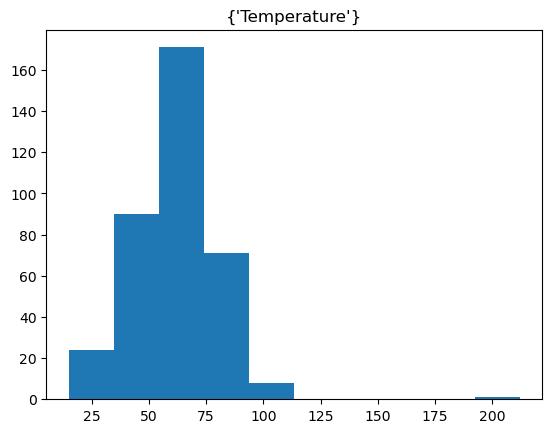

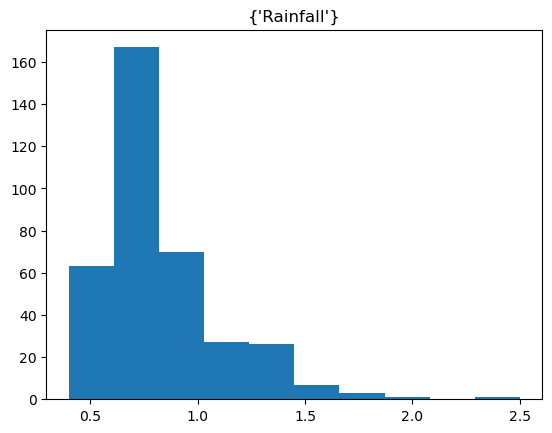

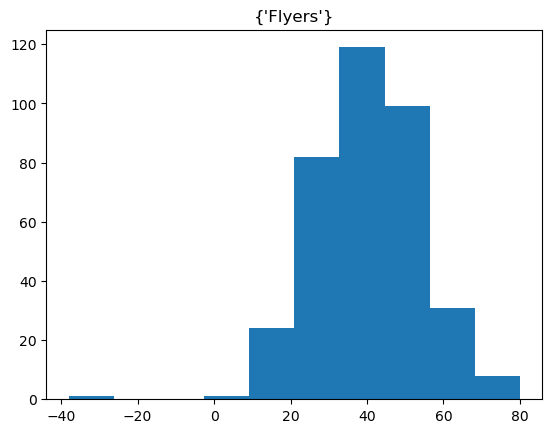

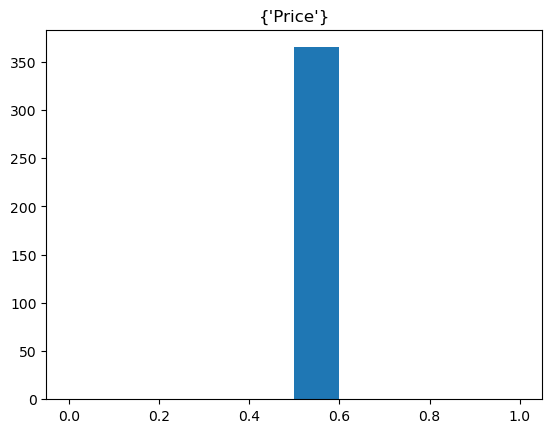

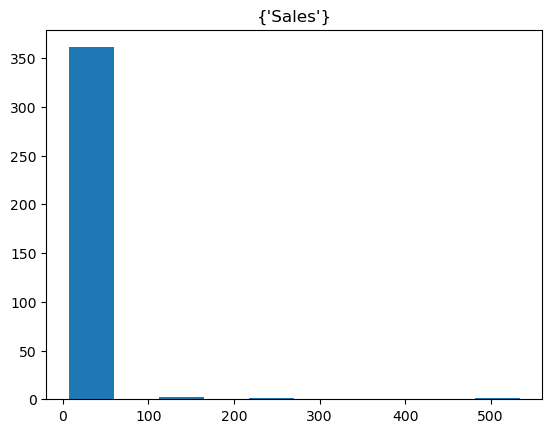

In [35]:
hist(df)

## Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


### Comparing the df against the outliers identified with 1.5 multiplier:
* Date and Day are categoricals, that makes sense
* Temps less than 104.7 and greater than 16.7 make sense, there is one outlier around 200 on the hist plot
* Rainfall less than 1.3 and greater than .26 make sense, the lower fence makes sense but the upper fence cuts off a tail. The real outlier is around 2.5
* Flyers less than 76 and greater than 4, there is one outlier around -40, the upper fence cuts off the tail
* Price less than .5 and greater than .5, yep, because price is .50 regardless
* Sales less than 45 and greater than 5, there are outliers starting at 100. The ranges here don't make a lot of sense.

## Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


In [9]:
outliers(df, 3)

Date is a categorical column.
Day is a categorical column.
--------------------------------------------
Outliers Calculated with IQR Ranges, multiplier 1.5
Temperature < = 137.7 and > -16.3
Rainfall < = 1.69 and > -0.13
Flyers < = 103.0 and > -23.0
Price < = 0.5 and > 0.5
Sales < = 60.0 and > -10.0


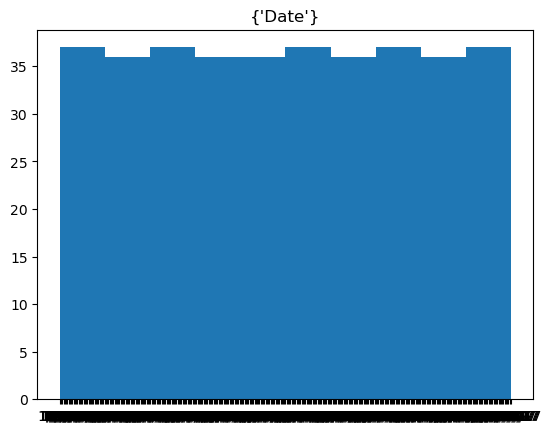

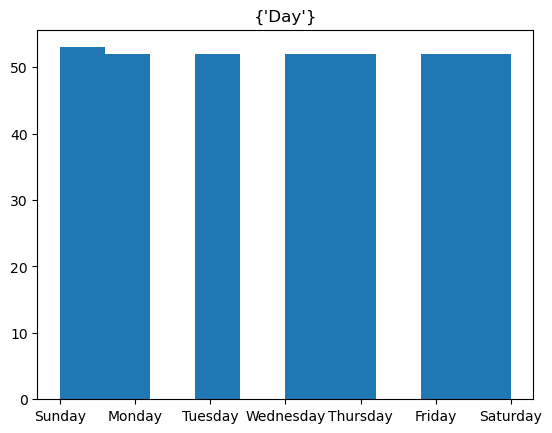

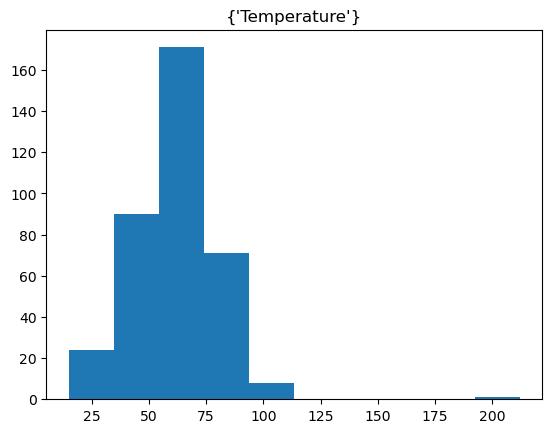

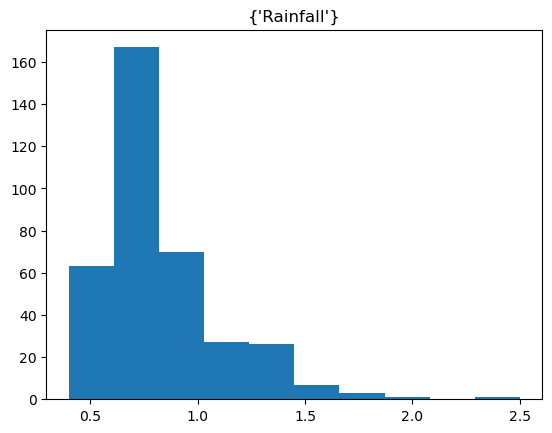

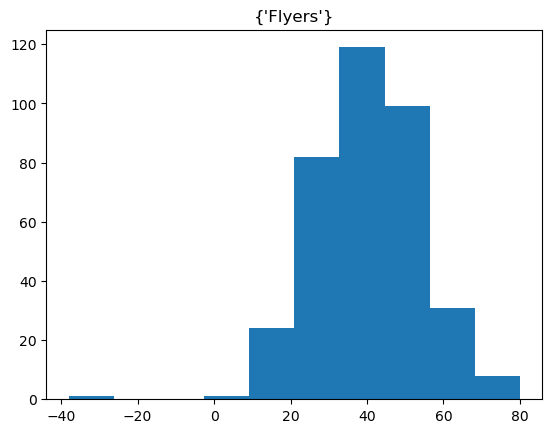

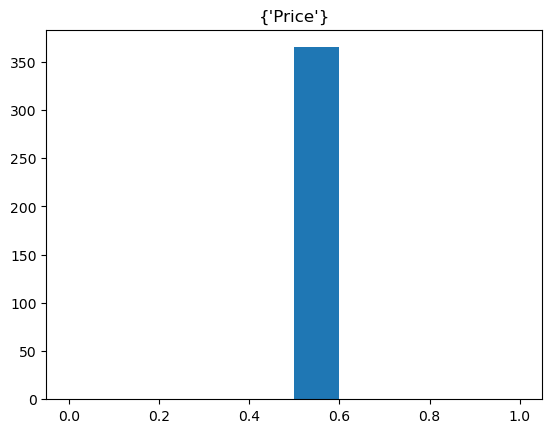

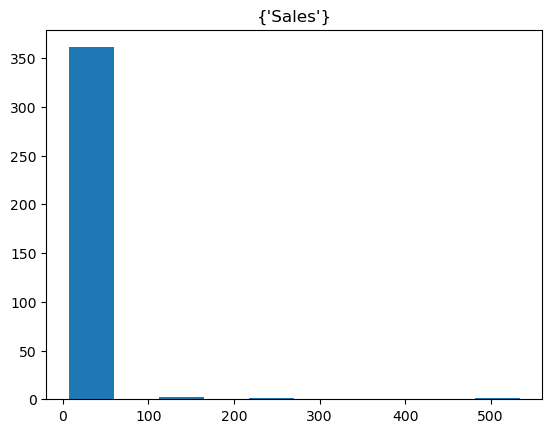

In [10]:
hist(df)

## Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


### Comparing the df against the outliers identified with 3 multiplier:
* Date and Day are categoricals, that makes sense
* Temps less than 137.7 and greater than -16.3 make sense, there is one outlier around 200 on the hist plot, this makes more sense
* Rainfall less than 1.69 and greater than -.13 make sense, this makes sense. The real outlier is around 2.5
* Flyers less than 103 and greater than -23, there is one outlier around -40, the upper fence cuts off the tail
* Price less than .5 and greater than .5, yep, because price is .50 regardless
* Sales less than 60 and greater than -10, there are outliers starting at 100. The ranges here make more sense

# 2. Identify if any columns in lemonade.csv are normally distributed. 
For normally distributed columns:

* Flyers
* Rainfall
* Temperature

In [66]:
normals = ['Temperature', 'Rainfall', 'Flyers']

for col in normals:
    # calc z score
    zscores = pd.Series((df[col] - df[col].mean() / df[col].std())
    
    # print scores
    print(df[col][zscores.abs()] >= 2)

SyntaxError: invalid syntax (2884006237.py, line 8)

## Use a 2 sigma decision rule to isolate the outliers.

In [24]:
# Calculate the z-score for flyers
zscores = pd.Series((df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std())

# Finds all of the observations two standard deviations or more.
df['Flyers'][zscores.abs() >= 2]

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

In [14]:
# Calculate the z-score for rainfall
zscores = pd.Series((df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std())

# Finds all of the observations two standard deviations or more.
df['Rainfall'][zscores.abs() >= 2]

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [15]:
# Calculate the z-score for temp
zscores = pd.Series((df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std())

# Finds all of the observations two standard deviations or more.
df['Temperature'][zscores.abs() >= 2]

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [19]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


### Do these make sense? Should certain outliers be kept or removed?

All but the temperature and flyers outliers make sense and should be kept. -38 and 212 are too extreme indicating a possible fat finger situation.

# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv



In [16]:
# Calculate the z-score for flyers
zscores = pd.Series((df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std())

# Finds all of the observations two standard deviations or more.
df['Flyers'][zscores.abs() >= 3]

324   -38
Name: Flyers, dtype: int64

In [17]:
# Calculate the z-score for rainfall
zscores = pd.Series((df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std())

# Finds all of the observations two standard deviations or more.
df['Rainfall'][zscores.abs() >= 3]

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [18]:
# Calculate the z-score for temp
zscores = pd.Series((df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std())

# Finds all of the observations two standard deviations or more.
df['Temperature'][zscores.abs() >= 3]

41    212.0
Name: Temperature, dtype: float64

### Do these make sense? Should certain outliers be kept or removed?

These make WAY more sense. How is it possible to have -38 flyers? Must be an input error, same with temp. Rainfall is also an extreme event because if it rains two inches, no one is going to be outside buying lemonade, but that's an anomaly - not an outlier like the temp and flyers issues pointed out.